# Grouping and reshaping data

We're going to look at some different ways of grouping and aggregating data. We're building towards thinking about 'split', 'apply', and 'combine workflows, which look something like this:

![split-apply-combine](https://github.com/core-skills/02-getting-to-know-the-tools/blob/master/notebooks/split-apply-combine.png?raw=true)

(taken from Jake VanderPlas' excellent [Python data science handbook](https://github.com/jakevdp/PythonDataScienceHandbook) - check out all the notebooks available on github if you want more in-depth examples than what we've worked through today).

## Groupby

Find the pandas `groupby` method and work out how it works on your dataframe. Hint: try passing a categorical column from your data. 

If you don't have a categorical column but you do have a column of numbers, you can generate groups by binning the data into seperate bins using the `pandas.cut` function - something like this:

```python
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
df = random_dataframe(30)

# Add a new column which bins the a values
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 50, inf],
                           labels=('low', 'high'))
```

`pandas.cut` can often be useful for investigating subsets of numerical data (e.g. ore grade in marginal blocks!).

In [24]:
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
#df = random_dataframe(30)

# Add a new column which bins the a values
#df['how_big'] = pandas.cut(df.a, 
#                           bins=[-inf, 50, in#f],
#                           labels=('low', 'high'))

import os

os.chdir('../data/')

from munging import load_data

df = load_data('python_data.csv')

In [25]:
df.describe()

,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,FE,SIO2,AL2O3,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
count,53758.000000,5.375800e+04,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,...,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.0
mean,522475.517622,7.500615e+06,543.005647,1.970637,29.022393,30.993030,360.239443,58.058392,4.997309,2.405147,...,6.126840,-1.185290,-0.355331,-0.420349,-0.420982,-24.089440,99.046832,-49.897400,-52.184226,0.0
std,4381.509811,1.119572e+03,44.083394,0.178074,29.039916,29.043406,74.571117,12.242179,8.415797,7.536345,...,7.816579,10.897091,6.985494,7.056649,6.994032,44.883289,13.997143,52.239444,49.787554,0.0
min,511745.661000,7.497581e+06,333.475000,0.100000,0.000000,1.000000,265.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.0
25%,518211.980250,7.499486e+06,516.403500,2.000000,10.000000,12.000000,265.000000,55.790000,2.520000,1.290000,...,4.720000,0.008000,0.030000,0.040000,0.020000,-99.000000,99.860000,-99.000000,-99.000000,0.0
50%,522279.659000,7.500803e+06,544.001000,2.000000,20.000000,22.000000,402.000000,59.450000,4.520000,2.330000,...,6.220000,0.020000,0.080000,0.060000,0.040000,2.632000,100.010000,-99.000000,-99.000000,0.0
75%,526322.170750,7.501504e+06,571.540750,2.000000,40.000000,42.000000,412.000000,62.660000,7.310000,3.830000,...,8.380000,0.038000,0.160000,0.100000,0.060000,2.971000,100.200000,5.050000,0.570000,0.0
max,533430.414000,7.502936e+06,708.533000,12.500000,218.000000,220.000000,435.000000,68.170000,58.750000,48.420000,...,27.660000,3.420000,5.650000,4.680000,8.400000,4.344000,107.970000,22.510000,9.870000,0.0


In [26]:
df


,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,FE,SIO2,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
0,B3D58,532634.759,7501740.104,572.050,2.0,12.0,14.0,435,58.88,2.50,...,9.76,0.058,0.130,0.04,0.01,-99.0,99.27,-99.00,-99.00,0
1,B3D58,532634.759,7501740.104,570.050,2.0,14.0,16.0,435,58.39,3.02,...,9.25,0.055,0.180,0.05,0.01,-99.0,99.56,-99.00,-99.00,0
2,B3D58,532634.759,7501740.104,568.050,2.0,16.0,18.0,435,56.26,4.37,...,10.45,0.061,0.200,0.06,-99.00,-99.0,99.68,-99.00,-99.00,0
3,B3D58,532634.759,7501740.104,566.050,2.0,18.0,20.0,435,56.83,3.36,...,10.31,0.051,0.250,0.04,0.01,-99.0,99.43,-99.00,-99.00,0
4,B3D58,532634.759,7501740.104,564.050,2.0,20.0,22.0,435,52.85,7.46,...,9.10,0.053,0.270,0.06,0.03,-99.0,99.25,-99.00,-99.00,0
5,B3D58,532634.759,7501740.104,562.050,2.0,22.0,24.0,435,48.97,11.28,...,8.38,0.051,0.330,0.13,0.03,-99.0,99.71,-99.00,-99.00,0
6,B3D58,532634.759,7501740.104,560.050,2.0,24.0,26.0,435,55.43,6.16,...,8.49,0.041,0.200,0.07,0.02,-99.0,99.91,-99.00,-99.00,0
7,B3D58,532634.759,7501740.104,558.050,2.0,26.0,28.0,435,58.31,5.04,...,7.93,0.036,0.130,0.07,0.03,-99.0,100.16,-99.00,-99.00,0
8,DH1367~BS4,527799.220,7502253.980,558.170,2.0,0.0,2.0,265,62.50,3.80,...,4.30,-99.000,0.150,0.04,0.09,-99.0,100.35,-99.00,-99.00,0
9,DH1367~BS4,527799.220,7502253.980,556.170,2.0,2.0,4.0,265,56.80,10.70,...,4.70,-99.000,0.140,0.05,0.06,-99.0,99.19,-99.00,-99.00,0


Next try to generate some summary statistics about each of your groups. The `info` and `describe` methods of the pandas dataframe are good places to start - try something like this:

```python
from random_data import random_dataframe

# Yet more bogus data
df = random_dataframe(100)

# Iterating in a for-loop
for category, grp_df in df.groupby('category'):
    print(f"\nInfo for group {category}")
    print(grp_df.describe())
```

In [6]:
for category, subset in df.groupby('category'):
    print(category,subset.describe())
    #print(category,subset.mean())  - or sum or min etc etc

x                 a          b
count   10.000000  10.000000
mean    73.277115   0.451773
std     25.593560   0.300144
min     29.149043   0.070249
25%     57.087681   0.184205
50%     75.272308   0.447625
75%     91.042779   0.647737
max    112.081091   0.930503
y                a         b
count   8.000000  8.000000
mean   56.573586  0.370084
std    33.283942  0.202098
min    16.853655  0.111989
25%    25.997874  0.228547
50%    55.312571  0.367807
75%    87.924855  0.468243
max    97.696099  0.733997
z                a          b
count  12.000000  12.000000
mean   63.750262   0.519708
std    26.422226   0.289340
min    -2.383222   0.080473
25%    54.517320   0.265716
50%    66.966516   0.623470
75%    78.212150   0.726865
max    98.914193   0.871543


In [27]:
#or can be done by
df.groupby('GEOCOD').mean()

,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,FE,SIO2,AL2O3,P,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
GEOCOD,,,,,,,,,,,,,,,,,,,,,
265,523170.316906,7.501149e+06,566.960206,1.978195,13.030942,15.009137,56.622416,5.962387,2.422481,-0.551524,...,6.385031,-1.851232,-0.435153,-0.579153,-0.535134,-21.815703,98.735318,-48.087931,-50.584207,0
402,521698.053116,7.500278e+06,514.952222,1.972663,54.187741,56.160404,62.039976,2.977477,1.587747,-0.060522,...,5.062284,-0.397337,-0.165960,-0.131242,-0.156629,-28.619716,99.706288,-53.232487,-54.977625,0
412,521717.556612,7.500220e+06,512.261208,1.967564,56.269717,58.237281,58.240089,4.805439,3.430813,-0.047946,...,6.452571,-0.419906,-0.129311,-0.151133,-0.181239,-28.187390,99.602410,-54.209264,-56.095059,0
435,522607.967673,7.500355e+06,551.389031,1.958880,13.328979,15.287858,56.231054,5.620475,2.605147,-0.608489,...,6.596383,-1.376091,-0.546824,-0.613913,-0.641592,-20.797560,98.561043,-46.952731,-49.678124,0


In [28]:
df.groupby('GEOCOD').max()

,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,FE,SIO2,AL2O3,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
GEOCOD,,,,,,,,,,,,,,,,,,,,,
265,VW13BS4B0001,531350.874,7502936.286,708.533,7.0,78.0,80.0,67.43,49.00,31.20,...,19.52,3.420,5.65,4.68,8.40,4.061,107.97,11.79,8.81,0
402,VW13BS4B0003,531766.626,7502174.071,681.163,2.0,218.0,220.0,68.17,39.55,23.29,...,12.96,0.418,1.46,1.70,6.88,4.344,102.31,11.66,4.98,0
412,RC17BS4B0585,533322.392,7502075.050,639.741,2.0,200.0,202.0,67.32,55.56,31.65,...,14.26,0.741,4.23,1.92,2.64,3.938,102.25,10.98,9.87,0
435,RC17VIV0005,533430.414,7502056.245,671.738,12.5,68.0,70.0,67.12,58.75,48.42,...,27.66,0.824,4.35,2.94,5.56,4.075,102.19,22.51,8.42,0


In [29]:
df.groupby('GEOCOD').count()

,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,FE,SIO2,AL2O3,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
GEOCOD,,,,,,,,,,,,,,,,,,,,,
265,20115,20115,20115,20115,20115,20115,20115,20115,20115,20115,...,20115,20115,20115,20115,20115,20115,20115,20115,20115,20115
402,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986,...,12986,12986,12986,12986,12986,12986,12986,12986,12986,12986
412,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430,...,7430,7430,7430,7430,7430,7430,7430,7430,7430,7430
435,13227,13227,13227,13227,13227,13227,13227,13227,13227,13227,...,13227,13227,13227,13227,13227,13227,13227,13227,13227,13227


You don't have to iterate over the groups if you don't want to - you can pipeline them to an aggregating function directly (which is often easier to read).

```python
# Calculating an aggregation directly
df.groupby('category').sum()
```

Try looking at some of the other pandas aggregations: `count`, `first`, `last`, `mean`, `median`, `min`, `max`, `std`, `var`, `mad`, `prod`, `sum`. What do each of these do?

In [31]:
df.groupby('GEOCOD').describe()

ACDENS                                                             \
          count       mean        std   min      25%     50%    75%    max   
GEOCOD                                                                       
265     20115.0 -21.815703  43.585401 -99.0   1.9215  2.6430  2.993  4.061   
402     12986.0 -28.619716  47.018760 -99.0 -99.0000  2.5820  2.906  4.344   
412      7430.0 -28.187390  46.822671 -99.0 -99.0000  2.5805  2.886  3.938   
435     13227.0 -20.797560  42.996806 -99.0   2.0440  2.7040  3.041  4.075   

          AL2O3            ...    TIO2             TO                        \
          count      mean  ...     75%   max    count       mean        std   
GEOCOD                     ...                                                
265     20115.0  2.422481  ...    0.22  5.65  20115.0  15.009137  10.070847   
402     12986.0  1.587747  ...    0.05  1.46  12986.0  56.160404  32.167102   
412      7430.0  3.430813  ...    0.13  4.23   7430.0  58.237281  29.798581   
435     13227.0  2.605147  ...    0.22  4.35  13227.0  15.287858   9.246651   

                                      
        min   25%   50%   75%    max  
GEOCOD                                
265     1.0   8.0  14.0  20.0   80.0  
402     2.0  32.0  48.0  72.0  220.0  
412     2.0  38.0  52.0  72.0  202.0  
435     1.0   8.0  14.0  20.0   70.0  

[4 rows x 168 columns]

Take a look at some of the more advanced group options - for example you can set a category as an index, and pass functions which take an index and output a group.

```python
# Calculating an aggregation by specifying a mapping 
# from index to group
mapping = {'x': 'first', 'y': 'first', 'z': 'second'}
df.set_index('category').groupby(mapping).mean()
```

How might you write a small function to start to aggregate or summarize the data in your data's groups in more complex ways?

In [32]:
#we are taking first digit od geocod (index 0) to aggregate by strat
def geocode_to_strat(code):
    return int(str(code)[0])


In [34]:
df.set_index('GEOCOD').groupby(geocode_to_strat).mean()

,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,FE,SIO2,AL2O3,P,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
2,523170.316906,7.501149e+06,566.960206,1.978195,13.030942,15.009137,56.622416,5.962387,2.422481,-0.551524,...,6.385031,-1.851232,-0.435153,-0.579153,-0.535134,-21.815703,98.735318,-48.087931,-50.584207,0
4,522060.100223,7.500295e+06,528.683323,1.966118,38.583610,40.549728,58.916956,4.420294,2.394783,-0.273182,...,5.972469,-0.787126,-0.307605,-0.325401,-0.352731,-25.448898,99.233085,-50.979273,-53.140870,0


## Pivot table

Pivot tables are a lot like groupby operations but instead of ending up with one column of groups we can end up with multidimensional arrays of aggregations. 

In the diagram at the top of the page, you can think of a pivot table splitting the data using more than one column in the 'split' step.

This is generally more useful when we want to start to aggregate along multiple dimensions.

Using our example from above:

```python
import pandas
from numpy import inf
from random_data import random_dataframe

# Our faithful bogus dataframe
df = random_dataframe(3000, categories='uvwxyz')

# Add a new column which bins the a values
df['how_big'] = pandas.cut(df.a, 
                           bins=[-inf, 50, inf],
                           labels=('low', 'high'))

# make a new pivot table that calculates the mean for each
# of our subcategories - both 'x,y,z' and 'low' and 'high'
pivot = df.pivot_table('b', index='category', columns='how_big', aggfunc='mean')
```

Try creating a pivot table on your own data (as before you can use `pandas.cut` to bin numerical data if that's more useful).

In [42]:
#import pandas
from numpy import inf
#from random_data import random_dataframe

# Our faithful bogus dataframe
#df = random_dataframe(3000, categories='uvwxyz')

# Add a new column which bins the a values
#df['how_big'] = pandas.cut(df.a, 
#                           bins=[-inf, 25, 50, 75, inf],
#                           labels=('tiny', 'small', 'medium' 'large', 'huge'))

# make a new pivot table that calculates the mean for each
# of our subcategories - both 'x,y,z' and 'low' and 'high'
pivot = df.pivot_table('FE', index='GEOCOD', columns='DHID', aggfunc='max')

In [43]:
pivot



DHID,B3D58,DD05BS4B022,DD05BS4B023,DD05BS4B024,DD05BS4B025,DD08BS4B16,DD08BS4B18,DD08BS4B19,DD15BS4B0001,DD15BS4B0002,...,RC17BS4B0595,RC17VIV0001,RC17VIV0002,RC17VIV0003,RC17VIV0004,RC17VIV0005,RC17VIV0006,RC17VIV0018,VW13BS4B0001,VW13BS4B0003
GEOCOD,,,,,,,,,,,,,,,,,,,,,
265,NaN,62.18,NaN,NaN,NaN,NaN,63.42,NaN,63.46,63.47,...,61.29,NaN,NaN,NaN,NaN,NaN,NaN,56.5,63.09,NaN
402,NaN,NaN,NaN,62.08,64.77,NaN,NaN,66.57,NaN,NaN,...,NaN,NaN,NaN,60.73,NaN,NaN,65.1,NaN,NaN,62.46
412,NaN,NaN,63.12,57.91,59.58,NaN,NaN,66.19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,58.88,NaN,59.50,59.34,63.46,63.09,NaN,65.59,NaN,NaN,...,NaN,61.32,62.06,NaN,61.44,62.53,NaN,NaN,NaN,NaN


In [ ]:
df.groupby('how_big').count()

## Plotting data

Next we're going to use [seaborn](seaborn.pydata.org) to generate some pretty plots of our data. 

Most Python tutorials will introduce [matplotlib](https://matplotlib.org) at this stage because it's the default but seaborn is a much higher-level library with a nicer API, especially for exploratory vis (matplotlib will probably make more sense to you if you're coming from MATLAB world though). The only hangover is that we need to include the `%matplotlib inline` cell magic to tell Jupyter to render the graphics inline for us. 

We'll start by looking at our random dataset.  

In [44]:
%matplotlib inline
import seaborn
seaborn.set()

#from random_data import random_dataframe

# Set up our dataframe and pivot table
#df = random_dataframe(3000, categories='uvwxyz')
#df['how_big'] = pandas.cut(df.a, 
#                           bins=[-inf, 25, 50, 75, inf],
#                           labels=('tiny', 'small', 'medium' 'large', 'huge'))
#df.head()

For one-dimensional dataset we can try `seaborn.distplot`, `seaborn.kdeplot` and `seaborn.rugplot` to visualize the data.

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


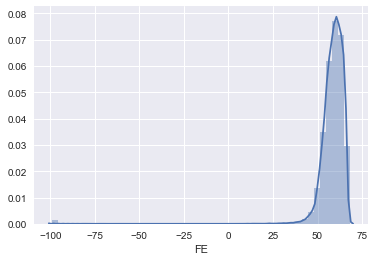

In [45]:
seaborn.distplot(df.FE)

In [72]:
from munging import load_data

df = load_data('python_data.csv')

In [77]:
df.columns

Index(['DHID', 'MIDX', 'MIDY', 'MIDZ', 'LENGTH', 'FROM', 'TO', 'GEOCOD', 'FE',
       'SIO2', 'AL2O3', 'P', 'MN', 'LOI', 'S', 'TIO2', 'MGO', 'CAO', 'ACDENS',
       'ASS_TO', 'LOI425', 'LOI650', 'ORE'],
      dtype='object')

In [104]:
remove_dls = ('FE', 'SIO2', 'AL2O3', 'P', 'MN', 'LOI', 'S', 'TIO2', 'MGO', 'CAO', 'ACDENS', 'LOI650')
copy_directly = [c for c in df.columns if c not in remove_dls]

In [105]:
clean = pandas.DataFrame(index=df.index)
for column in df.columns:
    if column in remove_dls:
        clean_copy = df[column].copy()
        clean_copy[clean_copy < 0] = nan
        clean[column] = clean_copy
    else:
        clean[column] = df[column].copy()

In [90]:
for code, subset in clean.groupby('GEOCOD'):
    print(code, subset.FE.dropna().mean())

265 57.619047130635266
402 62.363050154321165
412 58.60068258464853
435 57.365939380092975


In [73]:
#from numpy import nan

#fe = df.FE
#fe[fe < 0] = nan

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [76]:
fe.dropna().mean()

58.842347965078424

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


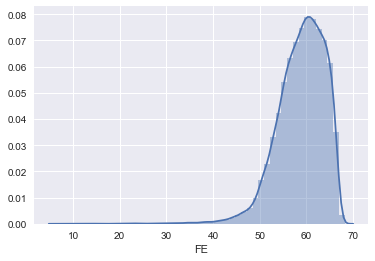

In [95]:
seaborn.distplot(clean.FE.dropna())

In [88]:
fe


0        58.88
1        58.39
2        56.26
3        56.83
4        52.85
5        48.97
6        55.43
7        58.31
8        62.50
9        56.80
10       56.50
11       57.40
12       61.30
13       61.40
14       56.60
15       61.60
16       63.60
17       60.60
18       54.70
19       61.50
20       62.30
21       58.40
22       62.00
23       63.10
24       61.40
25       57.60
26       59.90
27       51.50
28       55.70
29       58.10
         ...  
53728      NaN
53729    15.11
53730      NaN
53731    64.07
53732    64.91
53733      NaN
53734    66.30
53735    66.39
53736    65.65
53737      NaN
53738    67.16
53739    59.39
53740      NaN
53741    55.73
53742    56.74
53743    64.03
53744    57.64
53745    57.67
53746    54.16
53747      NaN
53748    58.12
53749    53.85
53750    33.93
53751      NaN
53752    53.37
53753    54.06
53754    58.43
53755    57.01
53756    50.77
53757    22.22
Name: FE, Length: 53758, dtype: float64

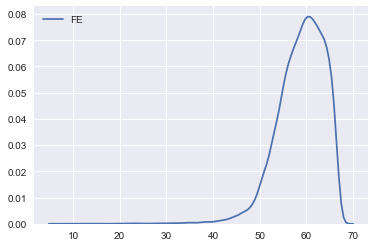

In [97]:
seaborn.kdeplot(clean.FE.dropna())

We can also use `jointplot` to generate a scatter and histograms of sets of data

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


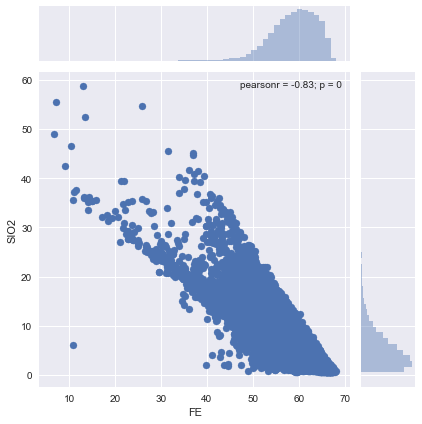

In [102]:
seaborn.jointplot('FE', 'SIO2', clean)

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


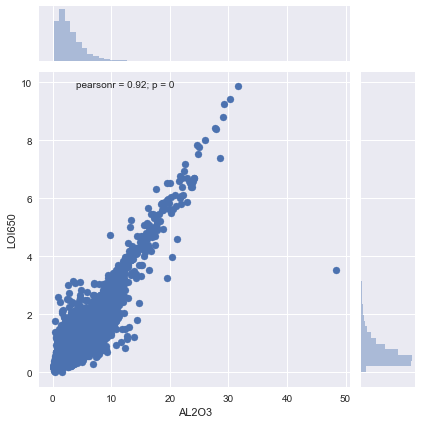

In [106]:
seaborn.jointplot('AL2O3', 'LOI650', clean)

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


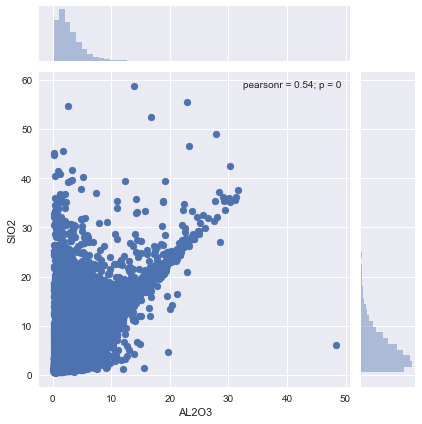

In [108]:
seaborn.jointplot('AL2O3', 'SIO2', clean)

In [101]:
clean.columns


Index(['DHID', 'MIDX', 'MIDY', 'MIDZ', 'LENGTH', 'FROM', 'TO', 'GEOCOD', 'FE',
       'SIO2', 'AL2O3', 'P', 'MN', 'LOI', 'S', 'TIO2', 'MGO', 'CAO', 'ACDENS',
       'ASS_TO', 'LOI425', 'LOI650', 'ORE'],
      dtype='object')

C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\carlie.byrne\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


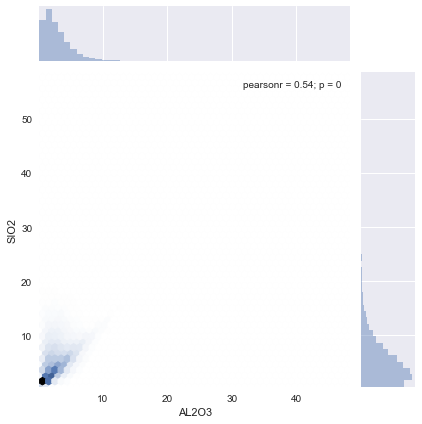

In [107]:
seaborn.jointplot('AL2O3', 'SIO2', clean, kind='hex')

For times when you want 'plot everything against everything else' you can do something like

In [116]:
import numpy as np

In [118]:
logr = pandas.DataFrame(index=clean.index)
for el in ('AL2O3', 'SIO2', 'P', 'MN'):
    logr[el] = np.log(clean[el] / clean['FE'])

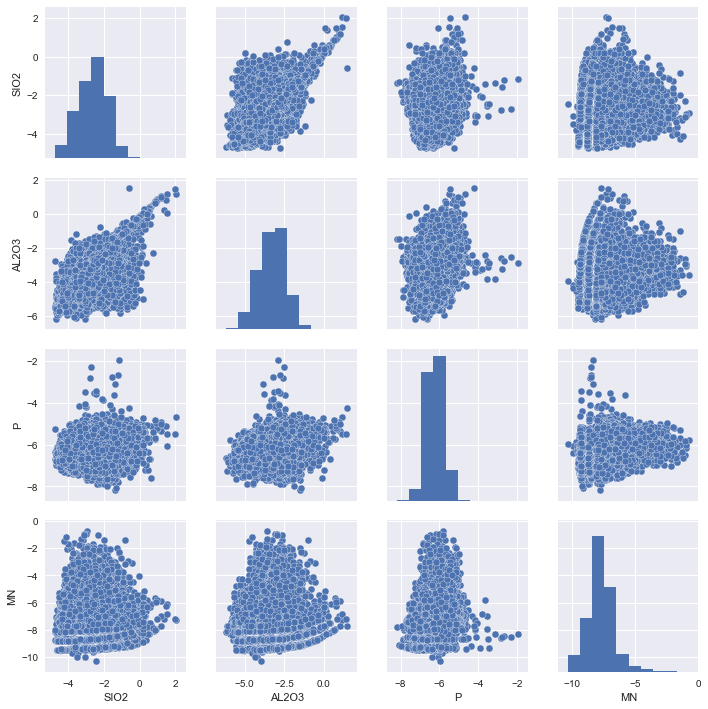

In [120]:
seaborn.pairplot(logr[[ 'SIO2', 'AL2O3', 'P', 'MN']].dropna())

This is really useful for pulling out relationships between variables

In [ ]:
#df['c'] = df.a + df.b * df.a
#df['d'] = df.c * df.b + df.a

In [ ]:
seaborn.boxplot(clean.FE.dropna())

In [ ]:
g = seaborn.PairGrid(clean.dropna())
g.map_diag(seaborn.kdeplot)
g.map_offdiag(seaborn.kdeplot, n_levels=6);

Seaborn also has a heap of support for categorical data. We can also include more dimensions in the visualization by specifying further dimensions as colors or point size

In [ ]:
seaborn.stripplot('a', 'how_big', hue='category', data=df, jitter=True, dodge=True)

We can also visualize the pivot table we generated above with heatmaps. 

In [130]:
pivot = clean.pivot_table('FE', index='GEOCOD', columns='DHID', aggfunc='mean')
pivot

DHID,B3D58,DD05BS4B022,DD05BS4B023,DD05BS4B024,DD05BS4B025,DD08BS4B16,DD08BS4B18,DD08BS4B19,DD15BS4B0001,DD15BS4B0002,...,RC17BS4B0595,RC17VIV0001,RC17VIV0002,RC17VIV0003,RC17VIV0004,RC17VIV0005,RC17VIV0006,RC17VIV0018,VW13BS4B0001,VW13BS4B0003
GEOCOD,,,,,,,,,,,,,,,,,,,,,
265,NaN,58.814667,NaN,NaN,NaN,NaN,59.076364,NaN,61.995,58.406923,...,56.93,NaN,NaN,NaN,NaN,NaN,NaN,54.625,59.264167,NaN
402,NaN,NaN,NaN,60.396667,62.753077,NaN,NaN,62.318333,NaN,NaN,...,NaN,NaN,NaN,56.436,NaN,NaN,63.8175,NaN,NaN,60.064
412,NaN,NaN,57.823333,56.047143,58.135000,NaN,NaN,60.190833,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,55.74,NaN,54.498000,57.351429,59.736667,59.196471,NaN,61.974286,NaN,NaN,...,NaN,58.663333,58.003571,NaN,58.322857,58.46,NaN,NaN,NaN,NaN


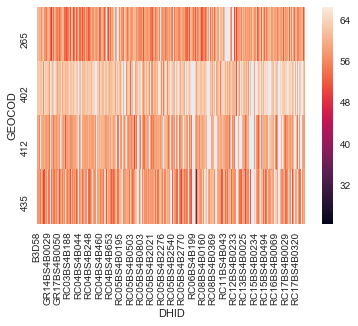

In [131]:
seaborn.heatmap(pivot)

ValueError: The number of observations cannot be determined on an empty distance matrix.

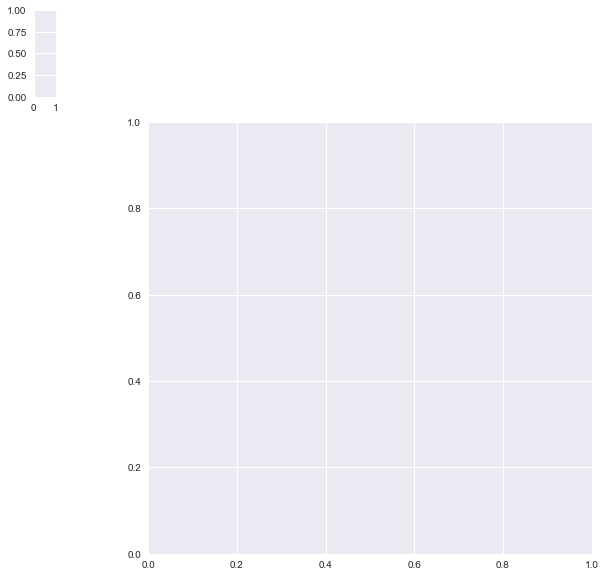

In [132]:
seaborn.clustermap(pivot)

Seaborn can get a lot more complicated than this and it's worth digging through the examples to find useful ways of slicing and dicing your dataframes into pictures.

Now try this out on your own dataset!